# Cobb-Douglas Production Function (3)
* [Understanding the Solow Growth Model: A Python Approach](https://medium.com/@gustavo.haase/understanding-the-solow-growth-model-a-python-approach-122867bf6da4)

$$ Y = A \cdot K^\alpha \cdot L^{(1 - \alpha)} $$

## Principle 3: Population Growth and Technological Progress

* Population Growth: $ \Delta L = n \cdot L $

* Technological Progress: $ \Delta A = g \cdot A $

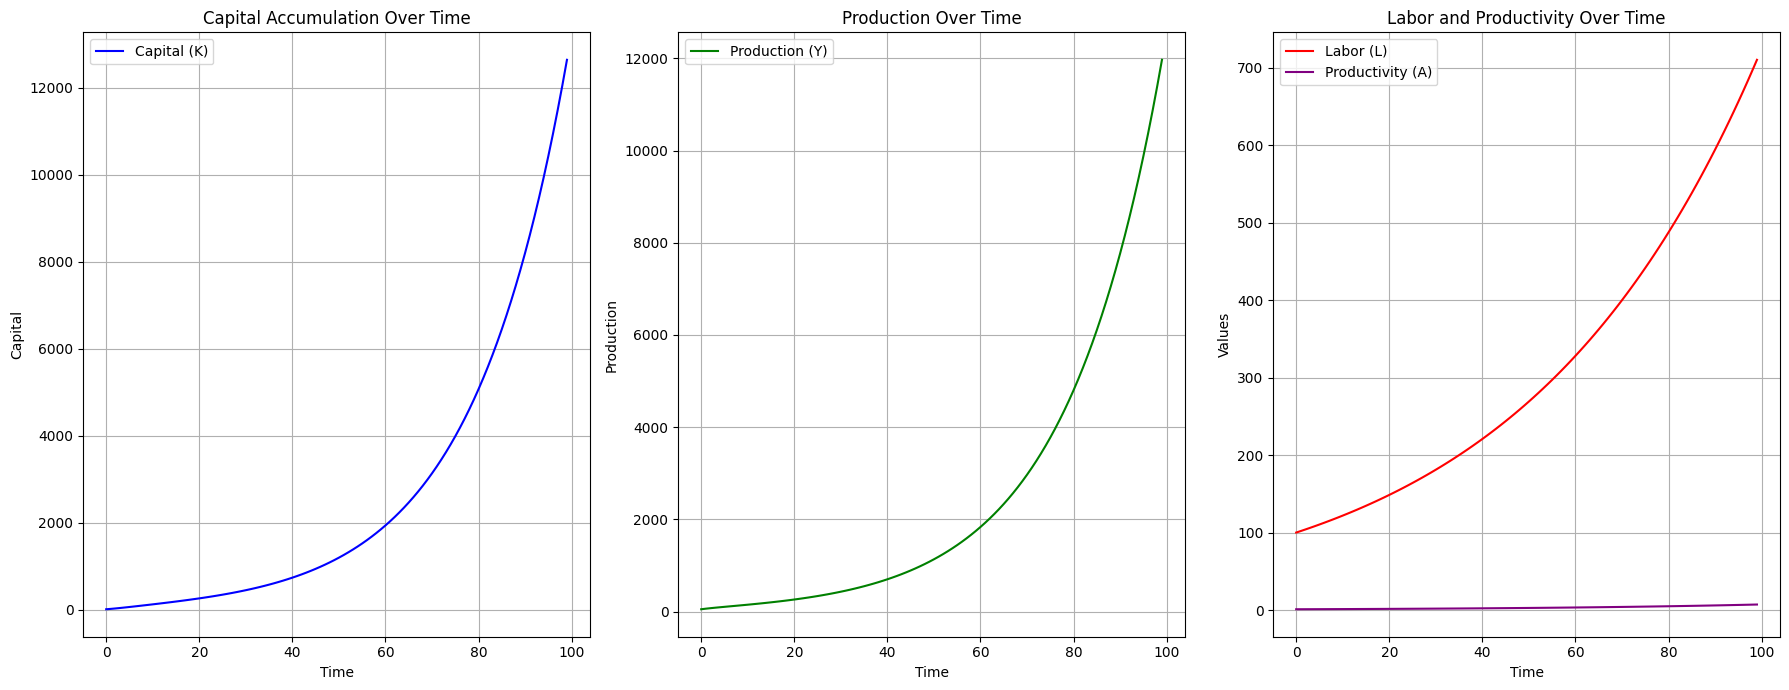

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the model parameters
alpha = 0.3
s = 0.2
delta = 0.1
n = 0.02
g = 0.02
T = 100
K0 = 10
L0 = 100
A0 = 1

# Cobb-Douglas production function
def cobb_douglas(K, L, A, alpha):
    return A * (K ** alpha) * (L ** (1 - alpha))

# Initializing vectors to store values of K, L, A, and Y
K = np.zeros(T)
L = np.zeros(T)
A = np.zeros(T)
Y = np.zeros(T)
K[0] = K0
L[0] = L0
A[0] = A0

# Simulating capital, labor, productivity, and production dynamics over time
for t in range(1, T):
    Y[t-1] = cobb_douglas(K[t-1], L[t-1], A[t-1], alpha)
    K[t] = K[t-1] + s * Y[t-1] - (delta + n + g) * K[t-1]
    L[t] = L[t-1] * (1 + n)
    A[t] = A[t-1] * (1 + g)

# Calculating production in the last period
Y[T-1] = cobb_douglas(K[T-1], L[T-1], A[T-1], alpha)

# Plotting the results
plt.figure(figsize=(18, 7))

# Capital over time
plt.subplot(1, 3, 1)
plt.plot(range(T), K, label='Capital (K)', color='b')
plt.xlabel('Time')
plt.ylabel('Capital')
plt.title('Capital Accumulation Over Time')
plt.grid(True)
plt.legend()

# Production over time
plt.subplot(1, 3, 2)
plt.plot(range(T), Y, label='Production (Y)', color='g')
plt.xlabel('Time')
plt.ylabel('Production')
plt.title('Production Over Time')
plt.grid(True)
plt.legend()

# Labor and productivity over time
plt.subplot(1, 3, 3)
plt.plot(range(T), L, label='Labor (L)', color='r')
plt.plot(range(T), A, label='Productivity (A)', color='purple')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Labor and Productivity Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()